In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
np.random.seed(1)

In [4]:
#Defining URL
url = 'https://raw.githubusercontent.com/prof-tcsmith/data/master/assignment-linear-regression.csv'
#Load the dataset into dataframe
data = pd.read_csv(url)
print(data.head())

      X          y
0  4.87  56.566624
1 -1.84 -15.462945
2 -1.58  -3.970165
3 -3.22  31.660106
4  2.60  21.452521


In [3]:
data.shape

(1000, 2)

In [5]:
print(data.columns)

Index(['X', 'y'], dtype='object')


In [6]:
data.columns = data.columns.str.strip()

In [7]:
#preparing data
X=data[['X']]
y=data['y']

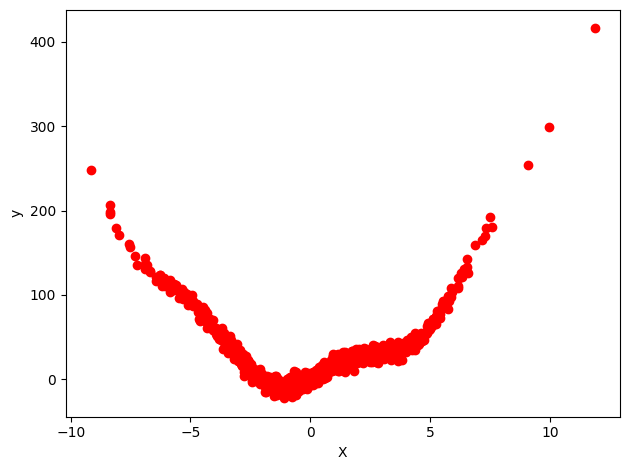

In [8]:
#Data exploration or Visualizing Data
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

In [9]:
#creating and fitting the model
lin_reg=LinearRegression()
_ = lin_reg.fit(X,y)

In [ ]:
LinearRegression(): This function creates a new instance of the sklearn.linear_model.
lin_reg.fit(X, y): This method fits the linear regression model to the data provided.

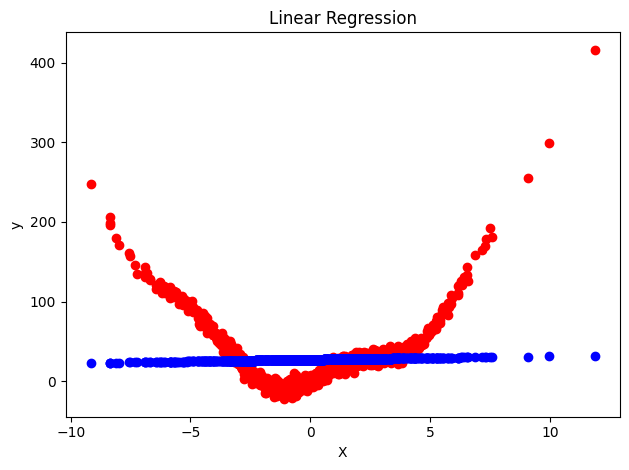

In [32]:
#Comparing Actual vs. Predicted Values
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X, lin_reg.predict(X), color='blue')

ax.set_title('Linear Regression')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

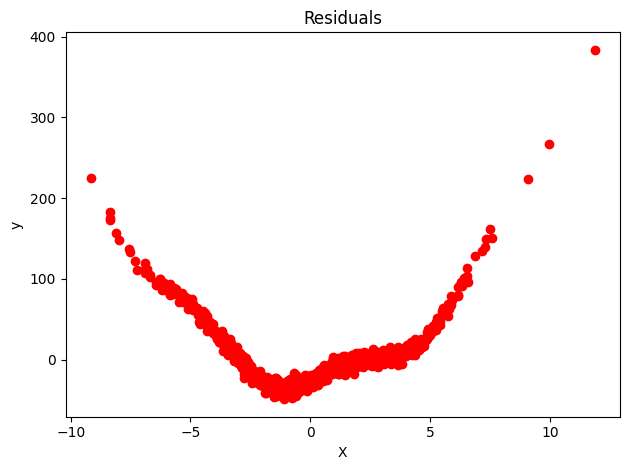

In [33]:
#Plotting Residuals to Evaluate Model Performance
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y-lin_reg.predict(X), color='red')

ax.set_title('Residuals')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()


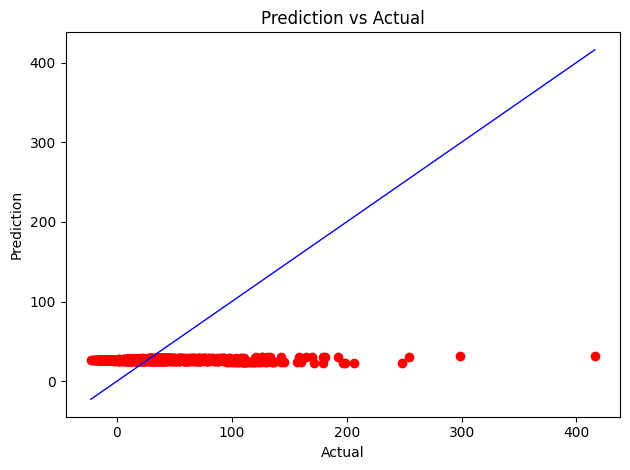

In [34]:
# scatter plot to show prediction versus actual then adding a line indicating perfect prediction
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(y, lin_reg.predict(X), color='red')

# Plotting the perfect prediction line
min_val = min(min(y), min(lin_reg.predict(X)))
max_val = max(max(y), max(lin_reg.predict(X)))
ax.plot([min_val, max_val], [min_val, max_val], color='blue', linewidth=1)

ax.set_title('Prediction vs Actual')
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
plt.tight_layout()
plt.show()

In [ ]:
we can visually evaluate how model predicts the actual values by comparing the anticipated values (red scatter points) against the perfect prediction 
line (blue). 
Greater deviations point to potential areas of development, whereas closer alignment to the blue line signifies higher model performance.

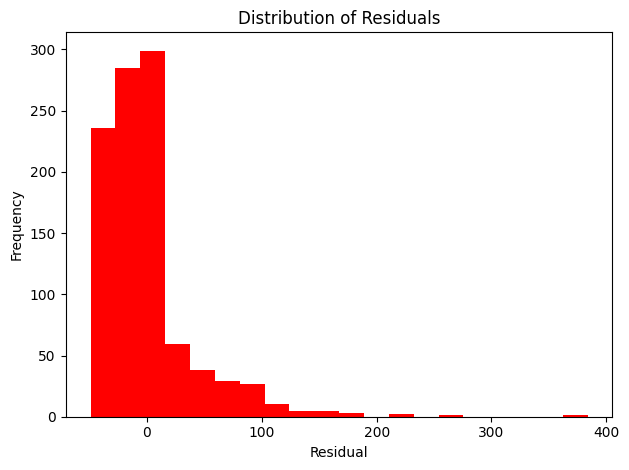

In [35]:
#  Plotting the Distribution of residuals

fig = plt.figure()
ax = fig.add_subplot()
#Histogram 
ax.hist(y-lin_reg.predict(X), bins=20, color='red')

ax.set_title('Distribution of Residuals')
ax.set_xlabel('Residual')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [36]:
# extracting coefficients of the model
b0 = lin_reg.intercept_
b1 = lin_reg.coef_[0]
r2 = lin_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x")

Y = 26.95 + 0.44x


It extracts the intercept and coefficient from a linear regression model and prints out the equation of the line in a readable format.
The fitted regression line, which depicts the relationship between the dependent variable (Y) and the predictor (x), is displayed in the specific output Y = 26.95 + 0.44x.

In [37]:
#Performance matrics
#R-squared value
print(f"R^2: {lin_reg.score(X, y):.3f}") 

#Adjusted R-squared value
print(f"Adjusted
R^2: {1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1):.3f}")

#Mean Squared Error
print(f"MSE: {np.mean((lin_reg.predict(X) - y)**2):.2f}")

#Root Mean Squared Error
print(f"RMSE: {np.sqrt(np.mean((lin_reg.predict(X) - y)**2)):.2f}")

#Mean Absolute Error
print(f"MAE: {np.mean(np.abs(lin_reg.predict(X) - y)):.2f}")

R^2: 0.001
Adjusted R^2: 0.000
MSE: 1607.26
RMSE: 40.09
MAE: 26.04


The dependent variable's variance is only 0.1% explained by the model, according to the r*2 value of 0.001. This implies that utilizing the mean of the target values alone is a nearly equal method of making predictions to that of the model.
𝑅*2 corrected for the number of predictors in the model, the adjusted R*2 score is 0.000.
The average squared difference between the actual and anticipated values is measured by the MSE. An MSE of 1607.26 suggests that there is a significant degree of prediction error. High MSE values indicate a considerable difference between the model's predicted and actual values.
An RMSE of 40.09 indicates that, on average, the model's predictions deviate from the actual values by about 40.09 units